In [5]:
!pip install pdf2image

In [6]:
# library for creating data paths
import os

# library for randonly selecting data points
import random

# library for performing numerical computations
import numpy as np

# library for creating and showing plots
import matplotlib.pyplot as plt

# library for reading and showing images
import matplotlib.image as mpimg

# importing all the required sub-modules from keras
from tensorflow.keras.optimizers import Adam  #can use adam_v2 too, from keras.optimizer import adam_v2
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model    #Model for Transfer learning
from keras.applications.vgg16 import VGG16    # Transfer learning here too (AGV comments), 
from keras.preprocessing.image import ImageDataGenerator  #For data augmentation
from keras.preprocessing.image import img_to_array, load_img  # to load images into arrays
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#convert PDF to JPG
from pdf2image import convert_from_path, convert_from_bytes
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# parent directory where images are stored in drive, careful how you build this
parent_dir = '/content/drive/MyDrive/ML Training/ScannedDocProject/Parent'

# path to the training and validation datasets within the parent directory
train_dir = os.path.join(parent_dir, 'Train')
validation_dir = os.path.join(parent_dir, 'Validation')
test_dir=os.path.join(parent_dir, 'Test')
# directory with our training Forms
train_A_dir = os.path.join(train_dir, 'A')
train_B_dir = os.path.join(train_dir, 'B')
train_C_dir = os.path.join(train_dir, 'C')
train_D_dir = os.path.join(train_dir, 'D')
train_E_dir = os.path.join(train_dir, 'E')

# directory with our validation Forms
validation_A_dir = os.path.join(validation_dir, 'A')
validation_B_dir = os.path.join(validation_dir, 'B')
validation_C_dir = os.path.join(validation_dir, 'C')
validation_D_dir = os.path.join(validation_dir, 'D')
validation_E_dir = os.path.join(validation_dir, 'E')

# directory with our Test Froms
test_A_dir = os.path.join(test_dir, 'A')
test_B_dir = os.path.join(test_dir, 'B')
test_C_dir = os.path.join(test_dir, 'C')
test_D_dir = os.path.join(test_dir, 'D')
test_E_dir = os.path.join(test_dir, 'E')



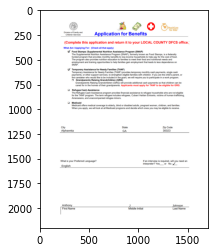

In [9]:
from pdf2image import convert_from_path
 
 
# Store Pdf with convert_from_path function
images = convert_from_path('/content/drive/MyDrive/ML Training/ScannedDocProject/Parent/Train/A/13-1.pdf')
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')
plt.imshow(images[0])

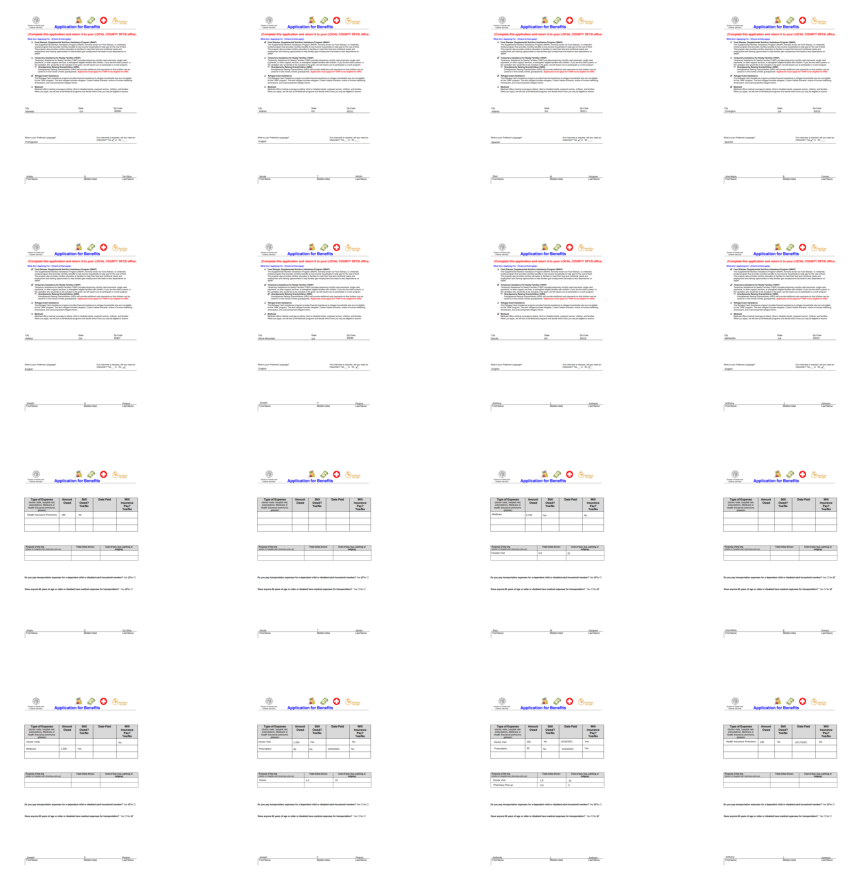

In [10]:
train_A_file_names = os.listdir(train_A_dir)   #list all file names
train_E_file_names = os.listdir(train_E_dir)

fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 16)

A_img_paths = [os.path.join(train_A_dir, file_name) for file_name in train_A_file_names[:8]]  
E_img_paths = [os.path.join(train_E_dir, file_name) for file_name in train_E_file_names[:8]] 

for i, img_path in enumerate(A_img_paths + E_img_paths):
    ax = plt.subplot(4, 4, i + 1)  #to see 16 images
    ax.axis('Off')
    images = convert_from_path(img_path)
 
    for i in range(len(images)):
   
      # Save pages as images in the pdf
      images[i].save('page'+ str(i) +'.jpg', 'JPEG')
      img = images[0]
    plt.imshow(img)

plt.show()

In [11]:
train_A_file_names = os.listdir(train_A_dir)
train_B_file_names = os.listdir(train_B_dir)
train_C_file_names = os.listdir(train_C_dir)
train_D_file_names = os.listdir(train_D_dir)
train_E_file_names = os.listdir(train_E_dir)


A_img_paths = [os.path.join(train_A_dir, file_name) for file_name in train_A_file_names[:len(train_A_file_names)-1]]  
B_img_paths = [os.path.join(train_B_dir, file_name) for file_name in train_B_file_names[:len(train_B_file_names)]]  
C_img_paths = [os.path.join(train_C_dir, file_name) for file_name in train_C_file_names[:len(train_C_file_names)]]  
D_img_paths = [os.path.join(train_D_dir, file_name) for file_name in train_D_file_names[:len(train_D_file_names)]]  
E_img_paths = [os.path.join(train_E_dir, file_name) for file_name in train_E_file_names[:len(train_E_file_names)]]

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_A_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(A_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('FormA'+ str(count[i]) +'.jpg', 'JPEG')



In [12]:
train_A_file_names = os.listdir(train_A_dir)
train_B_file_names = os.listdir(train_B_dir)
train_C_file_names = os.listdir(train_C_dir)
train_D_file_names = os.listdir(train_D_dir)
train_E_file_names = os.listdir(train_E_dir)


A_img_paths = [os.path.join(train_A_dir, file_name) for file_name in train_A_file_names[:len(train_A_file_names)-1]]  
B_img_paths = [os.path.join(train_B_dir, file_name) for file_name in train_B_file_names[:len(train_B_file_names)-1]]  
C_img_paths = [os.path.join(train_C_dir, file_name) for file_name in train_C_file_names[:len(train_C_file_names)-1]]  
D_img_paths = [os.path.join(train_D_dir, file_name) for file_name in train_D_file_names[:len(train_D_file_names)-1]]  
E_img_paths = [os.path.join(train_E_dir, file_name) for file_name in train_E_file_names[:len(train_E_file_names)-1]]

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_A_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(A_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
#    # Save pages as images in the pdf
#    img[j].save('FormA'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_B_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(B_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('FormB'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_C_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(C_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('FormC'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_D_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(D_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
#    # Save pages as images in the pdf
#    img[j].save('FormD'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(train_E_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(E_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#      img[j].save('FormE'+ str(count[i]) +'.jpg', 'JPEG')


In [13]:
#Now For Validation
validation_A_file_names = os.listdir(validation_A_dir)
validation_B_file_names = os.listdir(validation_B_dir)
validation_C_file_names = os.listdir(validation_C_dir)
validation_D_file_names = os.listdir(validation_D_dir)
validation_E_file_names = os.listdir(validation_E_dir)


A_img_paths = [os.path.join(validation_A_dir, file_name) for file_name in validation_A_file_names[:len(validation_A_file_names)-1]]  
B_img_paths = [os.path.join(validation_B_dir, file_name) for file_name in validation_B_file_names[:len(validation_B_file_names)-1]]  
C_img_paths = [os.path.join(validation_C_dir, file_name) for file_name in validation_C_file_names[:len(validation_C_file_names)-1]]  
D_img_paths = [os.path.join(validation_D_dir, file_name) for file_name in validation_D_file_names[:len(validation_D_file_names)-1]]  
E_img_paths = [os.path.join(validation_E_dir, file_name) for file_name in validation_E_file_names[:len(validation_E_file_names)-1]]

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(validation_A_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(A_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
#    # Save pages as images in the pdf
#    img[j].save('VFormA'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(validation_B_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(B_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('VFormB'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(validation_C_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(C_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('VFormC'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(validation_D_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(D_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#    img[j].save('VFormD'+ str(count[i]) +'.jpg', 'JPEG')

#creates .jpg from pdfs and saves them to path only run this section once or it will create duplicates
#os.chdir(validation_E_dir) 
#images=[]
#count=[]
#for i, img_path in enumerate(E_img_paths):
#    images.append(convert_from_path(img_path))
#    count.append(i+1)
#for i in range(len(images)):
  # Save pages as images in the pdf
#  img=images[i]
#  for j in range(len(img)):
    # Save pages as images in the pdf
#      img[j].save('VFormE'+ str(count[i]) +'.jpg', 'JPEG')

In [14]:
#Now lets Re shape! lets build the data generator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,  #we are rescaling images
                              horizontal_flip = True,   #We want hrizontal flips
                              vertical_flip = True, 
                              height_shift_range= 0.1,  #shift 10%
                              width_shift_range=0.1, 
                              rotation_range=20, #20 degrees r0tation
                              shear_range = 0.1,  #shear 10%
                              zoom_range=0.1)  #zoom 10%
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)  #we are building the data generator, Just rescaling test images only.
#no data augmentation for Test images, Remember this rule!
# Flowing training images in batches of 4 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,        
                                                    batch_size=16,
                                                    class_mode='categorical',     
                                                    target_size=(224, 224))     

# Flowing validation images in batches of 4 images using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,  #location of the images, this is dynamic, changes on each run
                                                         batch_size=8,
                                                         class_mode  = 'categorical',  #We have TWO folders, one per each class
                                                         target_size = (224, 224))

Found 278 images belonging to 5 classes.
Found 78 images belonging to 5 classes.


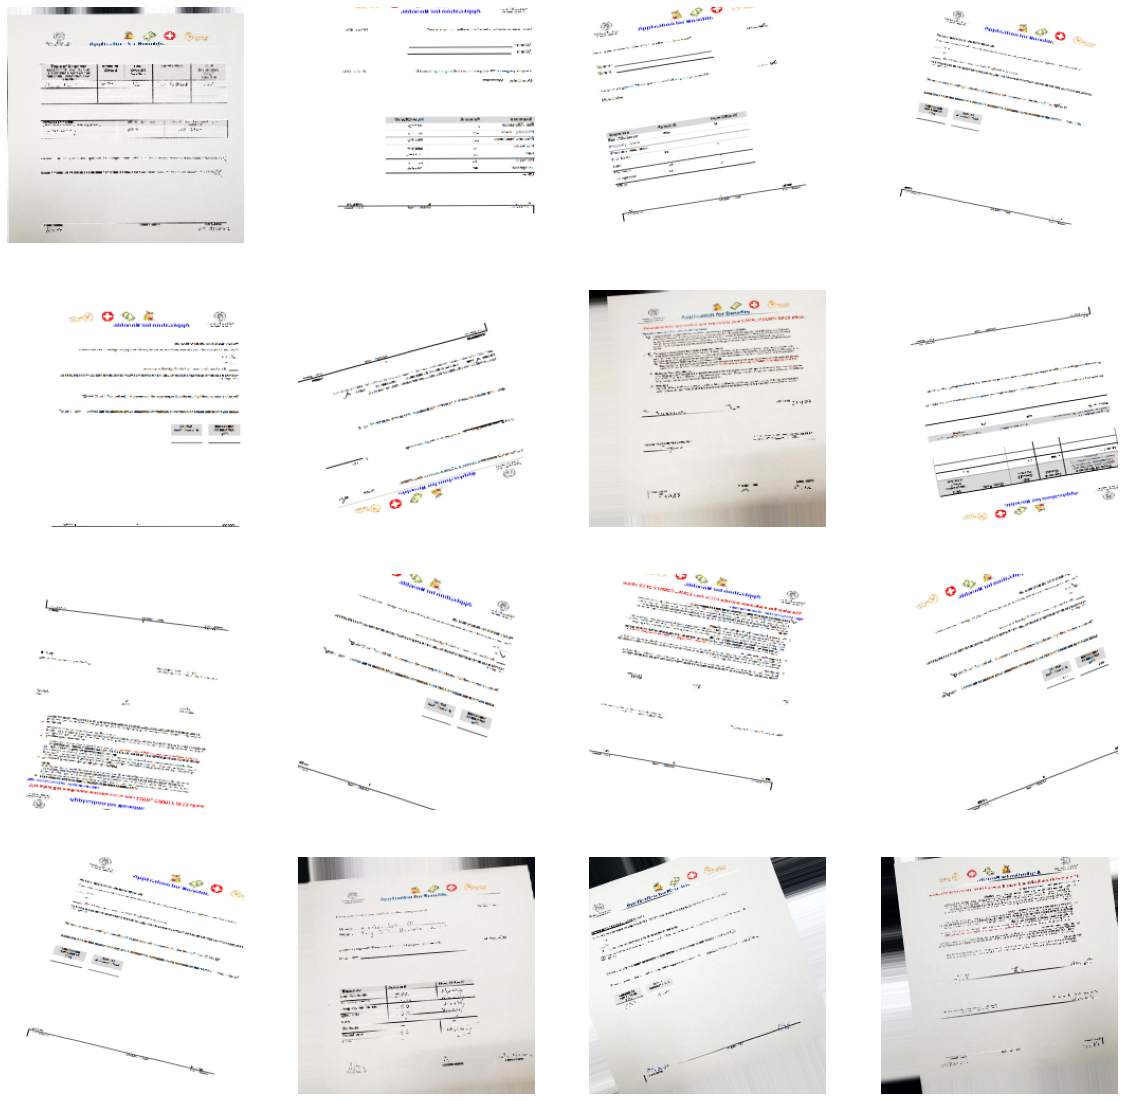

In [15]:
images, labels = next(train_generator) #generator function, dynamically generates new data (20 images) after the next
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
for (image, label, ax) in zip(images, labels, axes.flatten()):    #the labels because of the name of the folders, cats and dogs folders
    ax.imshow(image)
#    if label[0][3] == 1: 
#        ax.set_title('Form D')
#    else:
#        ax.set_title('Not Form D')
    ax.axis('off')

In [16]:
#We are building a simple CNN model, we use Sigmoid because it is only two categories, binary classification. No transfer learning yet.
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))  #Fully connected layer
cnn_model.add(Dense(5, activation='softmax'))  # 5 class classification

cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [18]:
## pulling a single large batch of random validation data for testing after each epoch
testX, testY = validation_generator.next()
#8 samples for validation

In [19]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)


In [20]:
model_history = cnn_model.fit(train_generator, 
                                  validation_data=(testX, testY),   #16 samples for validation
                                  callbacks=[stop_early],
                                  epochs=25)  

Epoch 1/25
18/18 [==============================] - 61s 3s/step - loss: 4.2844 - accuracy: 0.2158 - val_loss: 1.4300 - val_accuracy: 0.2500
Epoch 2/25
18/18 [==============================] - 27s 1s/step - loss: 1.6179 - accuracy: 0.2158 - val_loss: 1.6037 - val_accuracy: 0.1250
Epoch 3/25
18/18 [==============================] - 27s 1s/step - loss: 1.6084 - accuracy: 0.1871 - val_loss: 1.5942 - val_accuracy: 0.2500
Epoch 4/25
18/18 [==============================] - 27s 1s/step - loss: 1.5943 - accuracy: 0.2518 - val_loss: 1.4067 - val_accuracy: 0.1250
Epoch 5/25
18/18 [==============================] - 28s 2s/step - loss: 1.6122 - accuracy: 0.1906 - val_loss: 1.6199 - val_accuracy: 0.0000e+00
Epoch 6/25
18/18 [==============================] - 28s 2s/step - loss: 1.6107 - accuracy: 0.1942 - val_loss: 1.6173 - val_accuracy: 0.0000e+00
Epoch 7/25
18/18 [==============================] - 28s 2s/step - loss: 1.6105 - accuracy: 0.1942 - val_loss: 1.6152 - val_accuracy: 0.1250
Epoch 8/25
1

In [21]:
model = VGG16(include_top=True, weights='imagenet')   #To include top/input layer, importing the model. Includes input layer
#We need to indicate, until what layer (from top to down) we want to make the transfer.
transfer_layer = model.get_layer('block5_pool')  #From top to block5_pool, funtion to import the layers, and apply the transfer layers
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)  #From these layers I am creating a new model. Feature extracted part. 
#how to build the model, call the model Model function, input used
vgg_model.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [22]:
for layer in vgg_model.layers[0:17]:  #We are saying from layer 0 to 17 
    layer.trainable = False

In [23]:
new_model = Sequential()  #we are building a sequential model

# adding the convolutional part of the VGG16 model from above. And thats all!
new_model.add(vgg_model)

# flattening the output of the VGG16 model because it is from a convolutional layer.
new_model.add(Flatten())   #We were doing the flatten in the previous steps

# adding a dense output layer. We can add more layers before, can use Relu too (in the previous one)
new_model.add(Dense(5, activation='softmax'))

# setting optimizer, loss function, and learning rate. Optimizing layer
optimizer = Adam(learning_rate=1e-4)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
new_model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 2,485,253
Non-trainable params: 12,354,880
_________________________________________________________________


In [ ]:
new_model_history = new_model.fit(train_generator, 
                                  validation_data=(testX, testY),
                                  callbacks=[stop_early],   #This could reduce the number of epochs
                                  #steps_per_epoch=100,  #this needs to be at least equal to the number of Batch size. At least 100
                                  epochs=25)

Epoch 1/25
18/18 [==============================] - 168s 9s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2/25
18/18 [==============================] - 155s 9s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 3/25
18/18 [==============================] - 160s 9s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/25
18/18 [==============================] - 162s 9s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 5/25
18/18 [==============================] - 161s 9s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 6/25
18/18 [==============================] - 161s 9s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/25
18/18 [==============================] - 157s 9s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 8/25
18

In [25]:
# plotting the loss vs epoch curve for basic CNN model wit transfer learning
plot_history(new_model_history)

NameError: ignored

In [ ]:
os.chdir('/content/drive/MyDrive/ML Training/ScannedDocProject')
VGG16=new_model_history
VGG16.save()
VGG16.save('VGG16.h5')


AttributeError: ignored